In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class LinearRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.linear_1 = torch.nn.Linear(input_dim, 5)
        self.linear_2 = torch.nn.Linear(5, output_dim)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        out = self.linear_1(x)
        out = self.linear_2(out)
        out = self.relu(out)
        return out

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

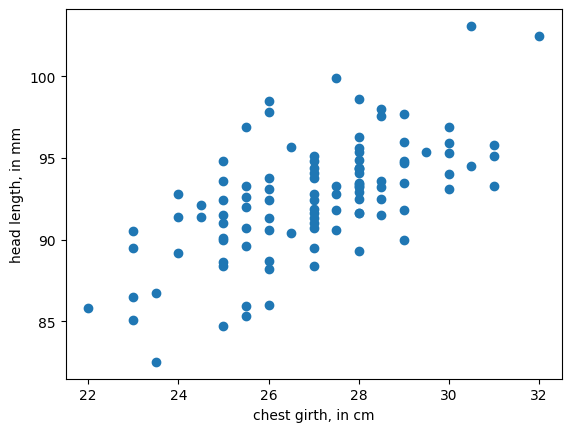

In [32]:
# x - обхват груди опоссума
# y - длина головы опоссума
data = pd.read_csv('data2/possum.csv')

x = np.array(data['chest']).reshape(-1, 1)
y = np.array(data['hdlngth']).reshape(-1, 1)

plt.scatter(x, y)
plt.xlabel('chest girth, in cm')
plt.ylabel('head length, in mm')
plt.show()

In [38]:
model = LinearRegression(1, 1).to(device)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

inputs = torch.from_numpy(x).float()
labels = torch.from_numpy(y).float()

inputs = inputs.to(device)
labels = labels.to(device)

for epoch in range(50000):
    model.train()
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, 50000, loss.item()))

Epoch [100/50000], Loss: 8213.6240
Epoch [200/50000], Loss: 7990.7476
Epoch [300/50000], Loss: 7770.4658
Epoch [400/50000], Loss: 7552.6196
Epoch [500/50000], Loss: 7337.0981
Epoch [600/50000], Loss: 7123.8403
Epoch [700/50000], Loss: 6912.8174
Epoch [800/50000], Loss: 6704.0303
Epoch [900/50000], Loss: 6497.5005
Epoch [1000/50000], Loss: 6293.2681
Epoch [1100/50000], Loss: 6091.3833
Epoch [1200/50000], Loss: 5891.9087
Epoch [1300/50000], Loss: 5694.9019
Epoch [1400/50000], Loss: 5500.4355
Epoch [1500/50000], Loss: 5308.5835
Epoch [1600/50000], Loss: 5119.4160
Epoch [1700/50000], Loss: 4933.0059
Epoch [1800/50000], Loss: 4749.4292
Epoch [1900/50000], Loss: 4568.7563
Epoch [2000/50000], Loss: 4391.0576
Epoch [2100/50000], Loss: 4216.4019
Epoch [2200/50000], Loss: 4044.8594
Epoch [2300/50000], Loss: 3876.4922
Epoch [2400/50000], Loss: 3711.3657
Epoch [2500/50000], Loss: 3549.5393
Epoch [2600/50000], Loss: 3391.0740
Epoch [2700/50000], Loss: 3236.0237
Epoch [2800/50000], Loss: 3084.4441
E

In [39]:
torch.save(model.state_dict(), 'second.ckpt')

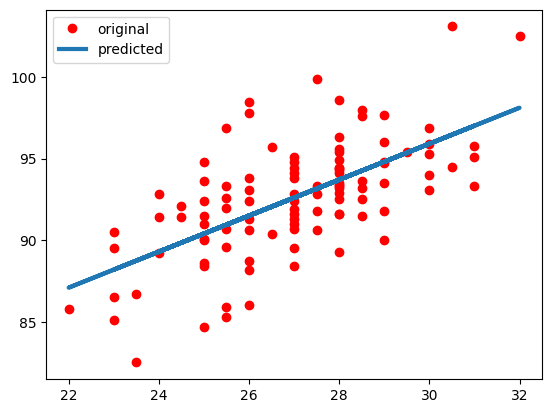

In [40]:
with torch.no_grad():
    model.eval()
    predicted = model.to('cpu')(torch.from_numpy(x).float())
    plt.plot(x, y, 'ro', label='original')
    plt.plot(x, predicted, lw=3, label='predicted')
    plt.legend()
    plt.show()